# Setting Up Your Enviroment
The easiest way to ensure you can run python and all the basic data science/machine learning packages is to use Anaconda with python 3: 

From the following link: 
https://www.anaconda.com/distribution/
- Select your operating system
- Select python version 3

Once you've installed Anaconda, open Anaconda Navigator on your computer and launch Jupyter Notebook: 

![anaconda](./anaconda.png)


## Supervised vs Unsupervised Learning
Supervised models learn from labeled training examples, typically called targets or labels (aka disease status). For every target/label, there should be an associated measurement, called a feature (age, weight, height). Common supervised learning models include: 
- Linear Regression
- Naive Bayes
- Natural Language Processing
- Support Vector Machines
- Neural Networks

Unsupervised models have a set of features, but no associated labels. Unsupervised learning algorithms must learn from patterns in the data, commonly using distance-based algorithms such as:
- PCA
- Anomoly detection
- Neural networks


## Machine Learning Analysis Steps
For supervised learning methods, we use our known labels (ground truth) to measure the accuracy of the model we created. 

A typical machine learning analysis consists of the following steps: 
- Step 1: Input features and labels
- Step 2: Parsing and Munging
- Step 3: EDA
- Step 4: Split the data into a training set and test set
- Step 5: Use the training data to fit a model 
- Step 6: Test the accuracy of the model on the labeled test set

### Step 1: 
For this demo, we'll use the iris dataset that comes installed with scikit learn. [There are several other datasets available in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
that you can use to pratice on as you learn to implement various models. 

In [8]:
# import the modules
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

This loads a dataset object from which we can use accessor methods to pull out various pieces that we can put together into a familiar dataframe using the pandas package. 

In [3]:
data = load_iris()

In [25]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

We can see that we have three different types of Iris as our labels, and the features Sepal Length, Sepal Width, Petal Length and Petal Width that we can use to try and identify what species of Iris we have. 

Let's use the pandas package to combine this into a dataframe that is easy to work with. 

First, we'll create a list of column headers (data.features + target): 

In [19]:
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

Next we'll use numpy's concatenate function to combine the matrices of features and their labels, and coerce this into a pandas dataframe: 

In [20]:
df = pd.DataFrame(data= np.c_[data.data, data.target],
                 columns=cols)

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Step 2: Parsing and Munging
Now that we we have a dataframe, it's easier to see how we can use each of the features to learn how to predict a label (Iris species). 

Let's look at the different types of labels we have for Iris species: 

In [24]:
df.target.unique()

array([0., 1., 2.])

Our labels are already converted from categorical to nominal variables, making them easier to use in any model: 
- Iris-Setosa = 0
- Iris-Versicolour = 1
- Iris-Virginica = 2

Let's convert them from float to integer: 

In [26]:
df.target = df.target.astype(int)

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step 3: EDA
We'll just go over this briefly here so you can see how it's done in python. But this is a big topic and we can go over it in more detail in a separate session if anyone is intersted. 

#### Quantiles/Summary Stats
We can view the quantiles and summary stats quickly using the describe function on our dataframe: 

In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can quickly check the correlation matrix: 

In [32]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


And plot it using matplotlib: 

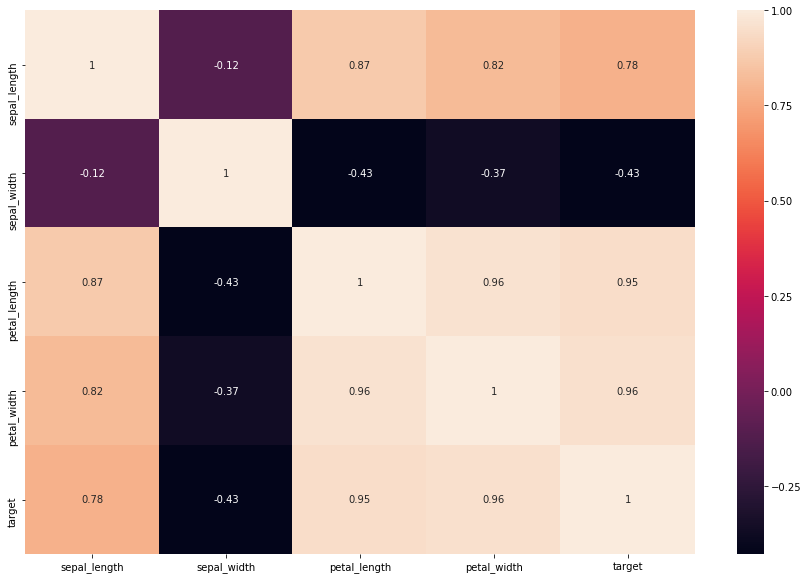

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

We can view the distributions of different features usin: 

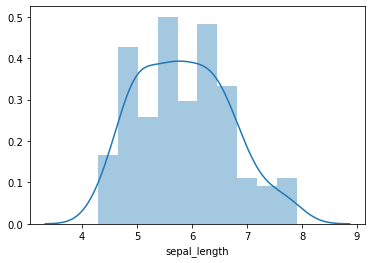

In [44]:
import seaborn as sns
sns.distplot(df.sepal_length)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158BB58EF98>,
      dtype=object)

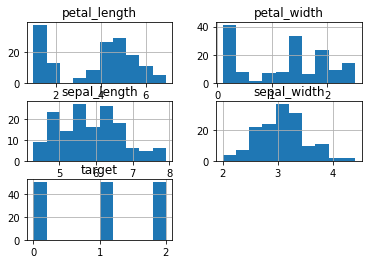

In [47]:
df.hist()

### Step 4: Train/Test/Split
Industry standards usually hold 20 to 30% of data aside for testing your model after training. We can use the train_test_split function from sklearn to easily split the data while keeping the labels properly matched. 

First we'll split apart the features (X) from the targets (y): 

In [53]:
X = df.drop("target", axis=1)

In [54]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
y = df['target']

In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, # hold aside 30 % for testing
                                                    random_state=42) # set a seed so results are same every time

So now we have four datasets: 
    - X_train are the features for training
    - y_train are the labeles for the training features
    - X_test are the features that the model has never seen that we'll use to make predictions on
    - y_test are the ground truth labels that we'll use to see how well our model did making predictions on X_test

### Step 5: Fitting a model
Now that our data has been prepped and split into features, labels, training and testing sets we are ready to fit the model to our data. This means that we are going to feed the data into a model, for this example K Nearest Neighbors, and see if the model can learn accurately from our data set. 

#### Model Selection
Which model you choose depends on your data set and the questions you need to answer. Sometimes, it's helpful to try out and compare a few different models to see which one provides you with the best accuracy and recall. As you get more experienced, you will develop an intuition for selecting the model, but in the meantime, here is a link to great cheat sheet: 

https://peekaboo-vision.blogspot.com/2013/01/machine-learning-cheat-sheet-for-scikit.html

#### K Nearest Neighbors
For now I'll just provide you with a quick, high-level overview on how KNN works. You can read more about it here: 
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

- Uses a distance metric (usually Euclidean or Minkowski) to measure the distance between a point your are trying to predict a label for and the K closest other points
- The algorithm classifies the point of interest by counting the majority label of the k closest points. 

In [68]:
# import the model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model object
knn = KNeighborsClassifier(n_neighbors=2) # specifying 2 neighbors

# fit the model to our iris training features and labels
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

For more details on the input/output arguments, you can read more here: 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- algorithm = method used to compute nearest neighbors
- leaf_size = default = 30, leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem
- metric = distance metric used
- n_jobs = parallelism (requires some setup)
- n_neighbors = num neighbors to use for classification (default = 5)
- p = power parameter from distance metric
- weights = any weights given to the prediction function

### Step 6: Evaluating the model
Now that we've fit the model to our training data, we can use the model to make predictions on our test set. We'll compare those predictions with the known labels for the test set to determine the accuracy of our model. 

In [70]:
# import model metrics package
from sklearn import metrics

y_pred = knn.predict(X_test) # we're running the test features throught the model w/out labels

In [71]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Our predictions are just an array of 0,1 or 2's, for each row in our test set- a prediction on what class the object belongs to. 

Let's compare our predictions with the labels to see how well our model performed: 

In [76]:
metrics.accuracy_score(y_test, y_pred) 

1.0

Above, we feed the function our vector of ground-truth labels to compare with the predictions. An accuracy of 1.0 in multi-label classification indicates that we have 100% match. 

We can add the argument "normalize=False" to provide us with a raw count of correct predictions that we can more easily convert into a percentage: 

In [77]:
metrics.accuracy_score(y_test, y_pred, normalize=False)

45

In [79]:
accuracy_score = metrics.accuracy_score(y_test, y_pred, normalize=False)/len(y_pred) * 100

In [80]:
accuracy_score

100.0

### Further Reading
Here's a great walk-through on the whole process that walks you through testing the algorithm on different values of k: 
https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75